<img src = "https://s3-us-west-2.amazonaws.com/courses-images-archive-read-only/wp-content/uploads/sites/222/2014/12/20104824/Figure_16_01_02b.jpg" alt = "Encabezado MLDS2 Protecto Final" width = "90%" height = "200">  </img>

# **_SUBENFRIAMIENTO EN SISTEMAS DE REFRIGERACIÓN_**
____

<img src = "https://www.bitzer.de/shared_media/html/est-610/Images/jpg/18014398729259403__Web.jpg" alt = "Figura 1" width = "30%%" height = "30%" style="display: block; margin: 0 auto">  </img>
<p style="text-align: center;">Figura 1: Circuito de subenfriamiento de líquido</p>

<div style="text-align: justify">

Los sistemas de refrigeración comercial constantemente tienen actualizaciones en sus circuitos y/o elementos buscando   
mejorar su eficiencia energética; uno de las propuestas más comunes es el subenfriamiento de líquido refrigerante con   
el fin de aumentar la capacidad de evaporadores, los diseñadores han propuesto varios circuitos y uno de ellos es el   
presentado en la figura 1, consiste en un intercambiador de calor que toma parte del líquido que sale del condensador    
y lo expande para así refrigerar el líquido restante, este refrigerante expandido cambia de fase a gas y es nuevamente   
succionado por el compresor.  

</div>


## 1.ENTENDIMIENTO DEL NEGOCIO ##
---
### _1.A OBJETIVOS DEL NEGOCIO:_ ###

1. Predecir el ahorro en consumo energético de un sistema de refrigeración comercial entre un sistema que cuenta  
    con subenfriador de líquido y uno que no.

2. Seleccionar el tipo de sistema adecuado para la ciudad y condiciones de operación del lugar de estudio, en   
   este caso un área comercial de la ciudad de Cúcuta.  



### _1.B METAS DEL PROYECTO DE ML:_ ###

<div style="text-align: justify">

1. Implementar varios modelos de aprendizaje de máquina supervisados con el fin de conocer despues del tiempo **$t_{1}$**  
   de cuánto sería el consumo de energía del sistema para unas condiciones iniciales con subenfriamiento activado.

2. Encontrar los hiperparámetros que generan el mejor comportamiento de cada uno de los modelos aplicados.

2. Seleccionar el modelo que mejor predice el comportamiento de los consumos de energía y sustentarlo a través de 
   alguna métrica.

<div/>

## 2. ENTENDIMIENTO DE LOS DATOS: ##
---
### _2.A RECOLECCIÓN DE LOS DATOS_ ###

<div style="text-align: justify">
Se importan las librerias que se usarán en la primera sección del proyecto, los datos se obtienen del supervisor
del sistema de refrigeración del lugar a verificar, este supervisor cuenta con históricos de más de 500 variables
de control, tanto del controlador central, como de controladores remotos y el medidor de energía del sistema, el
cual registra la potencia consumida cada minuto. 

<div/>

<img src = "https://assets.danfoss.com/photos/preview/197106/ID107323828811-0201_preview.jpg?w=300&h=300" alt = "Figura 1" width = "25%" height = "25%" style="display: block; margin: 0 auto">  </img>
<p style="text-align: center;">Figura 2: Sistema de supervisión y control</p>

<div style="text-align: justify">

Todos los controladores se conectan al supervisor vía modbus o LON y finalmente, este supervisor permite monitorear
remotamente los datos desde cualquier pc, ya que cuenta con web-server y procolo TCP/IP; para la obtención de los datos
se validaron las credenciales de ingreso, se seleccionaron las variables a descargar, el periodo temporal de revisión y
el periodo de muestreo, estos fueron recibidos desde el cotrol en formato _**.txt**_

<div/>

In [4]:
import sklearn
from sklearn.datasets import *
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### _2.B DESCRIPCIÓN DE LOS DATOS_ ###

<div style="text-align: justify">

Se comprueba que el dataset tiene el tamaño esperado y se han leído las variables con el tipo esperado, a continuación
la descripción y justificación de cada una de las características seleccionadas:

-_**Time:**_ Fecha y hora en la que se toma el dato, este tipo de sistemas tienen una configuración que relaja los paramétros 
de control durante la noche.
     
-_**TempExterior:**_ Temperatura ambiente, de gran importancia pues uno de los elementos más importantes del sistema es un
intercambiador de calor de fluido refrigerante con aire ambiente, bajas temperaturas ambiente mejoran la transferencia y mejoran la
eficiencia del sistema.
      
-_**Pres.Aspirac AB:**_ Presión a la que succionan los compresores del área de congelación, la presión de succión debe ser alta
ya que así se logra la mejor eficiencia desde el pto. de vista termodinámico, sin embargo, valores muy altos limitan la transferencia
de calor a los evaporadores y aumentan el consumo eléctrico de compresores.

-_**Pres.Aspirac AM:**_ Presión a la que succionan los compresores del área de refrigeración, la presión de succión debe ser alta
ya que así se logra la mejor eficiencia desde el pto. de vista termodinámico, sin embargo, valores muy altos limitan la transferencia
de calor a los evaporadores y aumentan el consumo eléctrico de compresores.  
  
-_**Pres Descarga A:**_ Presión a la que descargan los compresores, siempre se desean valores bajos pero están restringidos por la 
temperatura ambiente y las presiones de succión, su aumento impacta directamente en el consumo de energía.  
  
-_**Sensor Intercam:**_ Sensor de temperatura a la salida del intercambiador de subcooling, tener un buen subcooling disminuye el consumo,
sin embargo, en este caso se usa parte de la capacidad de los compresores de refrigeración para lograrlo, encontrar el subcooling
adecuado es una tarea que requiere experimentación y en algunos casos el punto óptimo podría ser incluso la anulación por completo
del intercambiador.  
  
-_**Capacidad Asp. AB:**_ Porcentaje de compresores prendidos para el área de congelación.  
  
-_**Capacidad Asp. AM:**_ Porcentaje de compresores prendidos para el área de refrigeración.  
  
-_**Medidor 1  Pot. Total:**_ Potencia instántanea leída por el medidor de energía, esta sería la etiqueda del conjunto de datos.  
  
-_**Medidor 1  Consumo:**_ Consumo de referencia para válidar que la medida de potencia instántanea tiene sentido.


</div>

In [5]:
df = pd.read_csv("~/Downloads/M_Cucuta_ML.txt", delimiter = ',')
#print(df.head)
#print(df.iloc[0:10,:])
print(df.shape)
df.dtypes


(48139, 10)


Time                           object
TempExterior (SI)             float64
Pres.Aspirac AB (SI)          float64
Pres.Aspirac AM (SI)          float64
Pres Descarga A (SI)          float64
Sensor Intercam (SI)          float64
Capacidad Asp. AB (NA)        float64
Capacidad Asp. AM (NA)        float64
Medidor 1  Pot. Total (EM)    float64
Medidor 1  Consumo (EM)       float64
dtype: object

### _2.C EXPLORACIÓN DE LOS DATOS_ ###

1. Se toma una muestra de los datos para comprobar que sean correctos, se encuentran las temperaturas en unidades
   Farenheit, se pasan a unidades Celsius para una mejor comprensión de los datos.  

In [7]:
print(df.sample(5))

                      Time  TempExterior (SI)  Pres.Aspirac AB (SI)  \
10225  04/17/2023 12:49:00               80.3                  17.7   
15497  04/21/2023 04:41:00               78.5                  10.9   
4367   04/13/2023 11:11:00               86.6                  12.1   
10692  04/17/2023 20:36:00               77.6                  10.5   
12488  04/19/2023 02:32:00               78.1                  12.3   

       Pres.Aspirac AM (SI)  Pres Descarga A (SI)  Sensor Intercam (SI)  \
10225                  39.9                 170.8                  87.9   
15497                  40.8                 189.5                  87.9   
4367                   45.8                 192.6                  94.8   
10692                  37.0                 163.5                  85.4   
12488                  40.3                 169.1                  88.3   

       Capacidad Asp. AB (NA)  Capacidad Asp. AM (NA)  \
10225                    33.3                    35.9   
15497   

### _2.D VERIFICACIÓN DE LA CALIDAD DE LOS DATOS_ ###

2. Se obtienen los principales valores estadísticos del conjunto de datos, allí ya se encuentran valores anormales como: temperaturas ambiente de $0^\circ F$, presiones de descarga de $0 psi$ y temperatura de sensor de intercambiador en $0^\circ F$, sin embargo, los valores de las medias son consecuentes con el lugar de instalación, por lo cual se presume que son solo algunos datos erróneos atípicos.

In [8]:
print(df.describe())

       TempExterior (SI)  Pres.Aspirac AB (SI)  Pres.Aspirac AM (SI)  \
count       48139.000000          48139.000000          48139.000000   
mean           83.430229             12.744733             41.859708   
std            14.400421              5.217391              8.729011   
min             0.000000              0.000000              0.000000   
25%            80.300000             10.000000             40.200000   
50%            84.800000             11.800000             42.400000   
75%            89.100000             14.400000             44.900000   
max           102.300000             68.200000             68.200000   

       Pres Descarga A (SI)  Sensor Intercam (SI)  Capacidad Asp. AB (NA)  \
count          48139.000000          48139.000000            48139.000000   
mean             185.939014             92.047872               42.915767   
std               38.512681             17.404427               21.112867   
min                0.000000              0.

## 3. PREPARACIÓN DE LOS DATOS ##

### _3.A SELECCIÓN DE DATOS FINALES_ ###

3. Se genera la función para cambio de la unidad de temperatura y se comprueba en una muestra de los datos.

In [9]:
def FtoC(temp_F):
    temp_C = (temp_F - 32) * 5/9
    return temp_C       


In [10]:
df['TempExterior (SI)'] = df['TempExterior (SI)'].apply(FtoC)
df['Sensor Intercam (SI)'] = df['Sensor Intercam (SI)'].apply(FtoC)
#print(df.describe())
print(df.sample(5))

                      Time  TempExterior (SI)  Pres.Aspirac AB (SI)  \
30694  05/01/2023 17:58:00          33.555556                  10.4   
40826  05/08/2023 18:50:00          32.333333                  10.6   
10636  04/17/2023 19:40:00          25.055556                  11.2   
46562  05/12/2023 18:26:00          31.555556                   9.8   
36188  05/05/2023 13:32:00          36.277778                  12.6   

       Pres.Aspirac AM (SI)  Pres Descarga A (SI)  Sensor Intercam (SI)  \
30694                  48.2                 217.9             39.611111   
40826                  40.2                 216.4             39.777778   
10636                  35.2                 179.8             30.888889   
46562                  39.3                 216.3             37.833333   
36188                  40.6                 236.6             40.500000   

       Capacidad Asp. AB (NA)  Capacidad Asp. AM (NA)  \
30694                    66.7                    64.1   
40826   

In [11]:
print(df.describe())

       TempExterior (SI)  Pres.Aspirac AB (SI)  Pres.Aspirac AM (SI)  \
count       48139.000000          48139.000000          48139.000000   
mean           28.572350             12.744733             41.859708   
std             8.000234              5.217391              8.729011   
min           -17.777778              0.000000              0.000000   
25%            26.833333             10.000000             40.200000   
50%            29.333333             11.800000             42.400000   
75%            31.722222             14.400000             44.900000   
max            39.055556             68.200000             68.200000   

       Pres Descarga A (SI)  Sensor Intercam (SI)  Capacidad Asp. AB (NA)  \
count          48139.000000          48139.000000            48139.000000   
mean             185.939014             33.359929               42.915767   
std               38.512681              9.669126               21.112867   
min                0.000000            -17.

In [12]:
print(df.sample(5))

                      Time  TempExterior (SI)  Pres.Aspirac AB (SI)  \
11766  04/18/2023 14:30:00          31.166667                  11.0   
9764   04/17/2023 05:08:00          26.166667                   9.8   
43709  05/10/2023 18:53:00          29.833333                   9.9   
4842   04/13/2023 19:06:00          30.388889                  11.6   
28041  04/29/2023 21:45:00          30.111111                  12.6   

       Pres.Aspirac AM (SI)  Pres Descarga A (SI)  Sensor Intercam (SI)  \
11766                  50.5                 182.6             36.500000   
9764                   37.8                 167.6             30.166667   
43709                  39.2                 202.9             36.777778   
4842                   37.3                 190.8             35.555556   
28041                  39.2                 220.5             38.111111   

       Capacidad Asp. AB (NA)  Capacidad Asp. AM (NA)  \
11766                    33.3                    28.2   
9764    

4. Se aplica redondeo a todo el conjunto de datos que sea tipo float, con el fin de mejorar la presentación y comprensión de los datos.

In [13]:
float_columns = df.select_dtypes(include ='float').columns
df[float_columns] = df[float_columns].round(1)
print(df.sample(5))

                      Time  TempExterior (SI)  Pres.Aspirac AB (SI)  \
28143  04/29/2023 23:27:00               30.7                  12.0   
717    04/10/2023 22:21:00              -17.8                   0.0   
11362  04/18/2023 07:46:00               24.8                  23.6   
19271  04/23/2023 19:35:00               27.7                  12.6   
17341  04/22/2023 11:25:00               27.1                  11.3   

       Pres.Aspirac AM (SI)  Pres Descarga A (SI)  Sensor Intercam (SI)  \
28143                  51.3                 180.0                  34.6   
717                     0.0                   0.0                 -17.8   
11362                  36.1                 155.1                  28.9   
19271                  38.9                 180.4                  32.3   
17341                  42.4                 161.0                  31.3   

       Capacidad Asp. AB (NA)  Capacidad Asp. AM (NA)  \
28143                    66.7                    35.9   
717     

5. Se procede a gráficar cada una de las columnas para entender mejor el porqué de ciertos valores atípicos y analizar visualmente
sectores sin datos o con datos anormales.

" # Create the second y-axis\nax2 = ax1.twinx()\n\n# Plot the second column on the right y-axis\nax2.plot(df['Time'], df['Sensor Intercam (SI)'], color='blue')\nax2.set_ylabel('Temp Sensor', color='blue')\n\n# Display the plot "

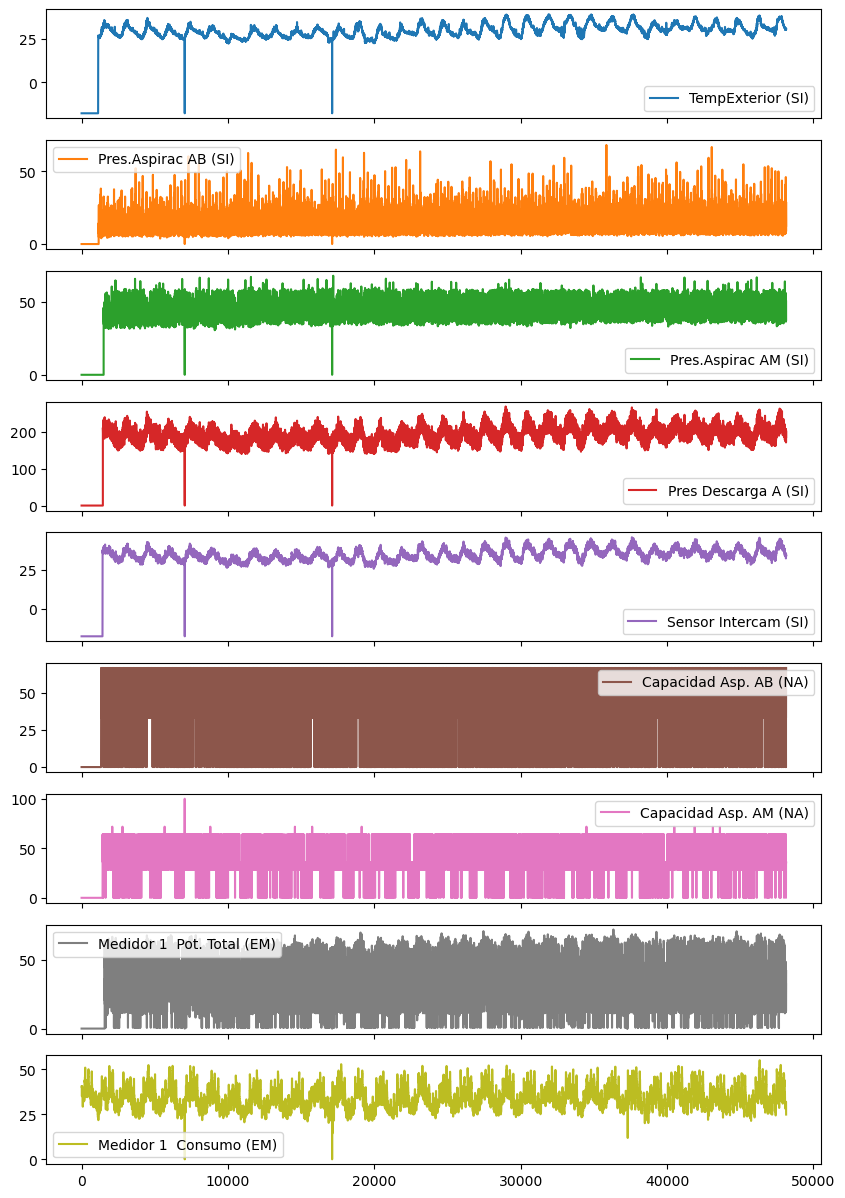

In [14]:
df.plot.line(subplots = True, figsize = (10, 15))
#fig, ax1 = plt.subplots()

# Plot the first column on the left y-axis
#ax1.plot(1, 1)

#ax1.set_xlabel('tiempo')
#ax1.set_ylabel('Temp_Exterior', color='red')

""" # Create the second y-axis
ax2 = ax1.twinx()

# Plot the second column on the right y-axis
ax2.plot(df['Time'], df['Sensor Intercam (SI)'], color='blue')
ax2.set_ylabel('Temp Sensor', color='blue')

# Display the plot """
#plt.show()

6. Se renombran cada una de las columnas para mejor lectura y manejo de la información, y se elimina la columna _Energy_, ya que
ha cumplido su función al comprobarse que los máximos de energy son coincidentes con los máximos de _Power_

In [15]:
df.columns = ['Time','Tamb', 'Ps_BT', 'Ps_MT', 'Pd', 'Tsc', 'Cap_BT', 'Cap_MT', 'Power', 'Energy']
df = df.drop('Energy', axis = 1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48139 entries, 0 to 48138
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    48139 non-null  object 
 1   Tamb    48139 non-null  float64
 2   Ps_BT   48139 non-null  float64
 3   Ps_MT   48139 non-null  float64
 4   Pd      48139 non-null  float64
 5   Tsc     48139 non-null  float64
 6   Cap_BT  48139 non-null  float64
 7   Cap_MT  48139 non-null  float64
 8   Power   48139 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.3+ MB
None


### _3.B LIMPIEZA DE LOS DATOS_ ###

7. Se decide eliminar todos los valores de presiones y/o temperaturas iguales o menores a $0$, ya que no tienen sentido
en este tipo de sistema, se opta por la eliminación en lugar de la imputación debido a que son muy pocos datos faltantes y ya
hay una buena cantidad de datos que representan completamente el comportamiento periodico de estos.

In [16]:
df = df.drop( df[ (df['Tamb'] <= 0) | (df['Tsc'] <= 0) | (df['Ps_BT'] <= 0) 
                | (df['Ps_MT'] <= 0) ].index )
"""df3 = df.drop( df[ df['Sensor Intercam (SI)'] <= 0 ].index )
df3 = df.drop( df[ df['Sensor Intercam (SI)'] <= 0 ].index ) """
#df3 = df[ (df['Tamb'] > 0) | (df['Tsc'] > 0) | (df['Ps_BT'] > 0) | (df['Ps_MT']  > 0) ]
print(df.shape)
print(df.head(10))

(46618, 9)
                     Time  Tamb  Ps_BT  Ps_MT     Pd   Tsc  Cap_BT  Cap_MT  \
1508  04/11/2023 11:32:00  31.1   10.1   46.2  192.8  36.4    33.3    35.9   
1509  04/11/2023 11:33:00  31.7    8.9   43.8  195.3  36.4    33.3    35.9   
1510  04/11/2023 11:34:00  31.3    8.9   43.8  192.8  36.4    33.3    35.9   
1511  04/11/2023 11:35:00  31.9    7.5   43.8  193.8  36.2    33.3    35.9   
1512  04/11/2023 11:36:00  33.0   18.3   43.8  197.6  36.2    33.3    35.9   
1513  04/11/2023 11:37:00  33.3   32.7   43.8  210.8  36.4    33.3    35.9   
1514  04/11/2023 11:38:00  33.8   12.4   40.3  222.8  36.7    66.7    64.1   
1515  04/11/2023 11:39:00  33.8   13.5   36.5  233.0  37.7    66.7    64.1   
1516  04/11/2023 11:40:00  34.1   13.5   41.4  222.4  38.4    66.7    35.9   
1517  04/11/2023 11:41:00  34.1   10.4   42.8  216.4  39.8    66.7    35.9   

      Power  
1508    0.0  
1509    0.0  
1510    0.0  
1511    0.0  
1512    0.0  
1513    0.0  
1514    0.0  
1515    0.0  
1516

8. Se grafica nuevamente el conjunto de datos luego de su depuración.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

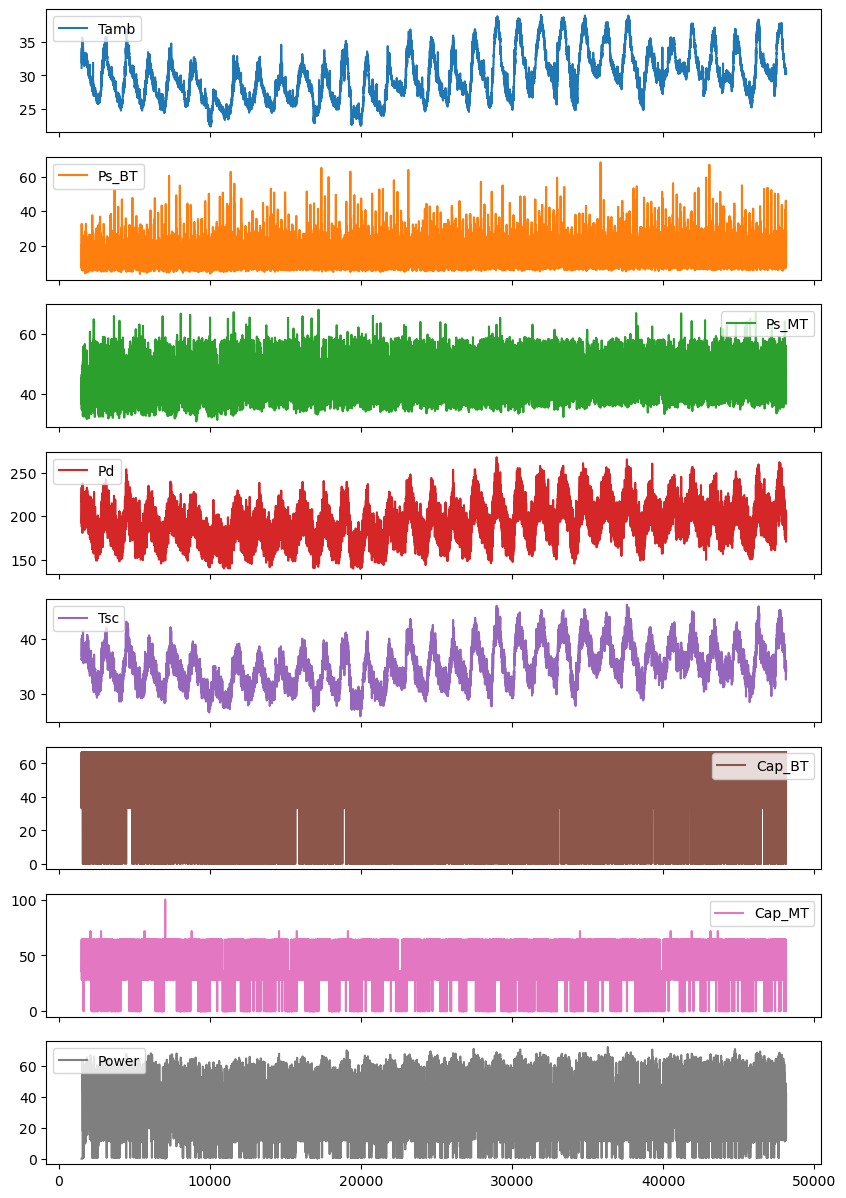

In [17]:
df.plot.line(subplots = True, figsize = (10, 15))

9. Se verifica que ahora los estadísticos son coherentes y representan de manera acertada al conjunto de datos.

In [18]:
print(df.describe())

               Tamb         Ps_BT         Ps_MT            Pd           Tsc  \
count  46618.000000  46618.000000  46618.000000  46618.000000  46618.000000   
mean      29.712420     13.074819     43.224585    191.770464     34.935917   
std        3.474572      4.873168      4.436796     20.226909      3.617382   
min       22.300000      3.800000     30.700000    139.500000     25.900000   
25%       27.100000     10.200000     40.400000    176.800000     32.100000   
50%       29.400000     11.900000     42.500000    190.300000     34.700000   
75%       31.800000     14.500000     44.900000    205.300000     37.400000   
max       39.100000     68.200000     68.200000    267.800000     46.300000   

             Cap_BT        Cap_MT         Power  
count  46618.000000  46618.000000  46618.000000  
mean      44.103587     37.410693     34.256924  
std       20.117015     13.311460     12.322916  
min        0.000000      0.000000      0.000000  
25%       33.300000     28.200000     

10. Se generan los histogramas para verificar si existe una distribución normal para cada una de las variables, analizar
gráficamente la dispersión de los datos en cada caso y comprobar el skew.

array([[<Axes: title={'center': 'Tamb'}>,
        <Axes: title={'center': 'Ps_BT'}>,
        <Axes: title={'center': 'Ps_MT'}>],
       [<Axes: title={'center': 'Pd'}>, <Axes: title={'center': 'Tsc'}>,
        <Axes: title={'center': 'Cap_BT'}>],
       [<Axes: title={'center': 'Cap_MT'}>,
        <Axes: title={'center': 'Power'}>, <Axes: >]], dtype=object)

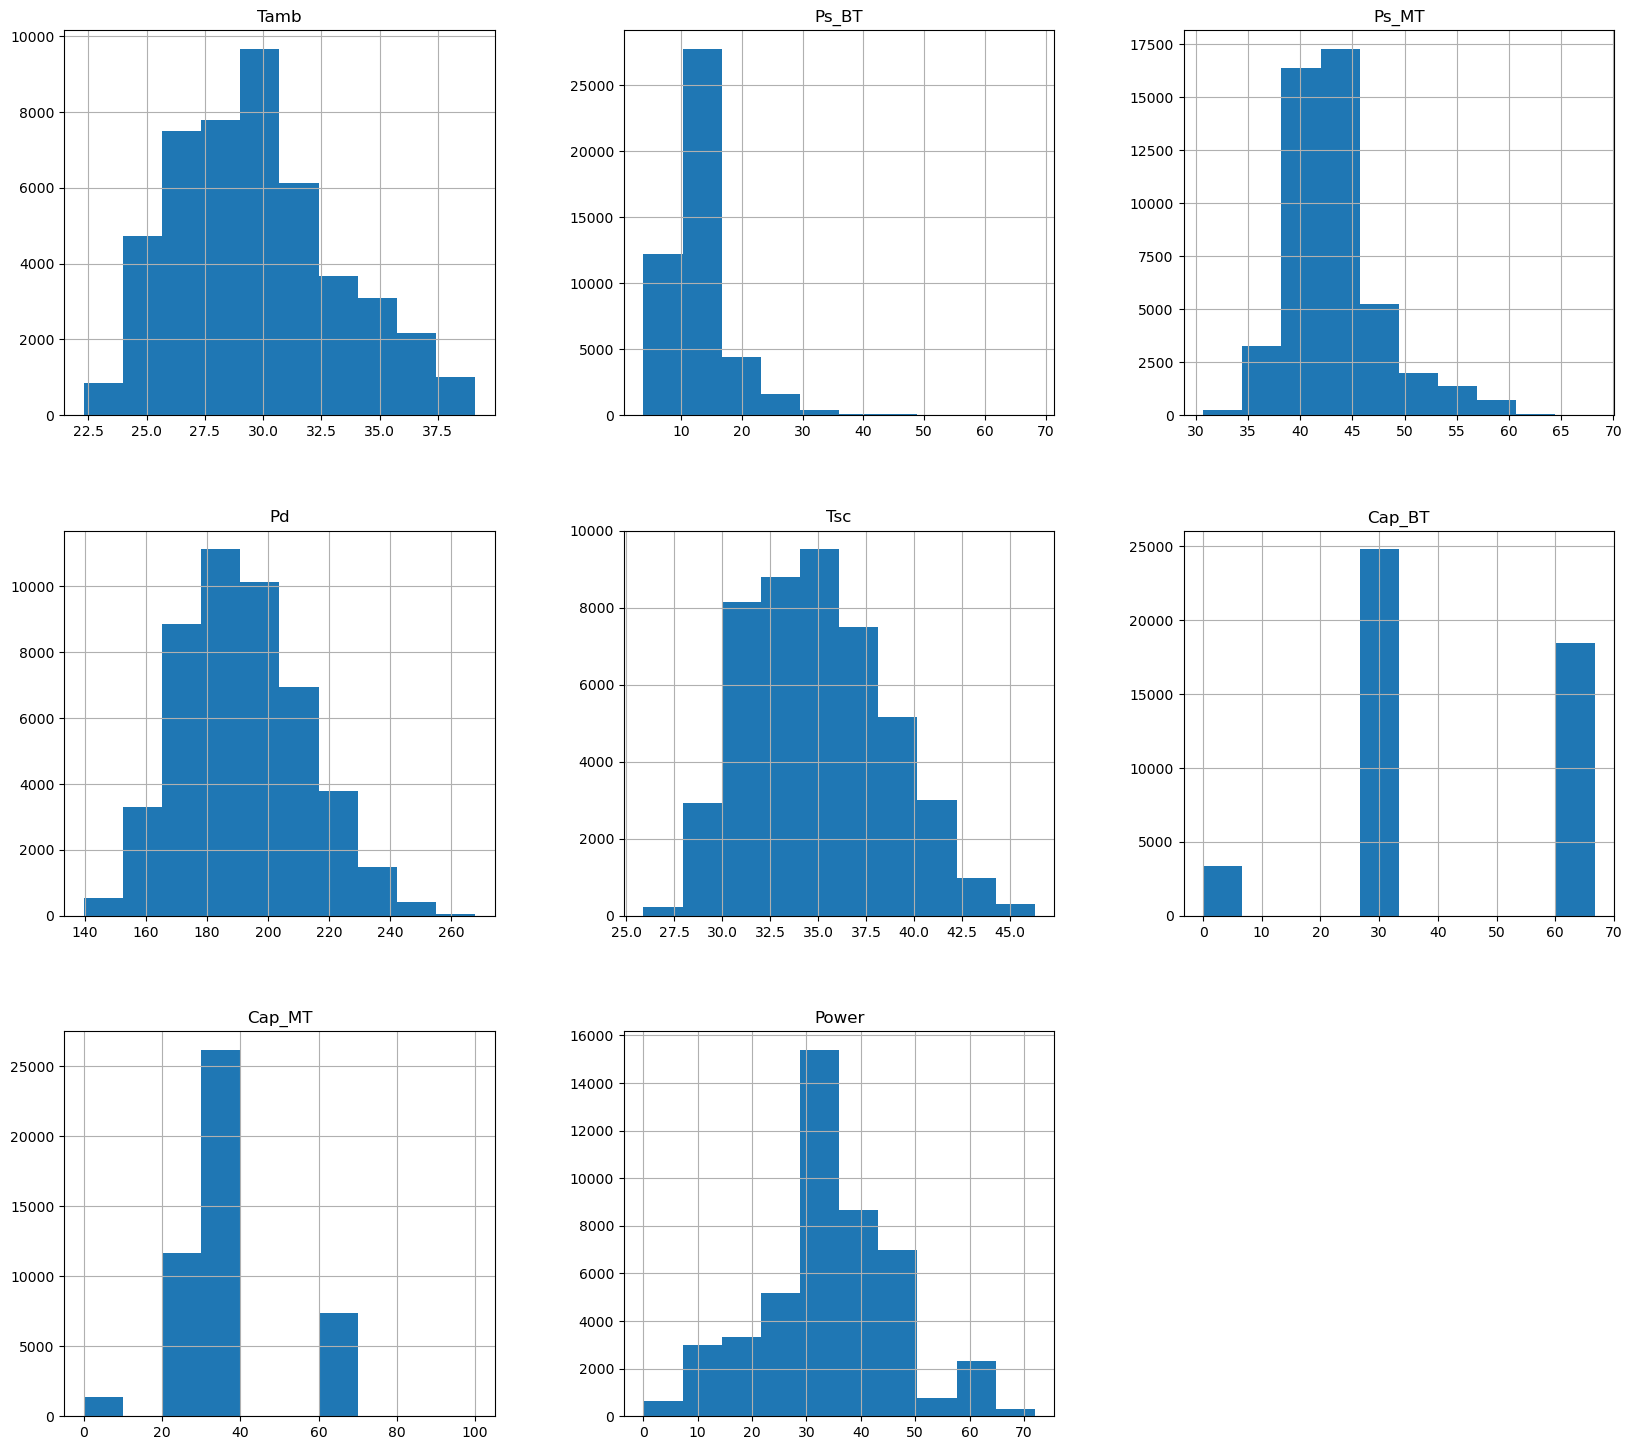

In [19]:
df.hist( figsize = (20, 18) )

11. Las cajas de Bigote permiten observar problemas principalmente en el control de la presión de BT (Congelación) y la presión de
descarga $P_{d}$, así como se evidencia que para la potencia hay una dispersión mas alta en los datos del tercer cuartil que en los del
segundo, lo cual comprueba el efecto de ajustes previos al sistema en busca de mantenerlo en los valores más bajos de potencia.

<Axes: >

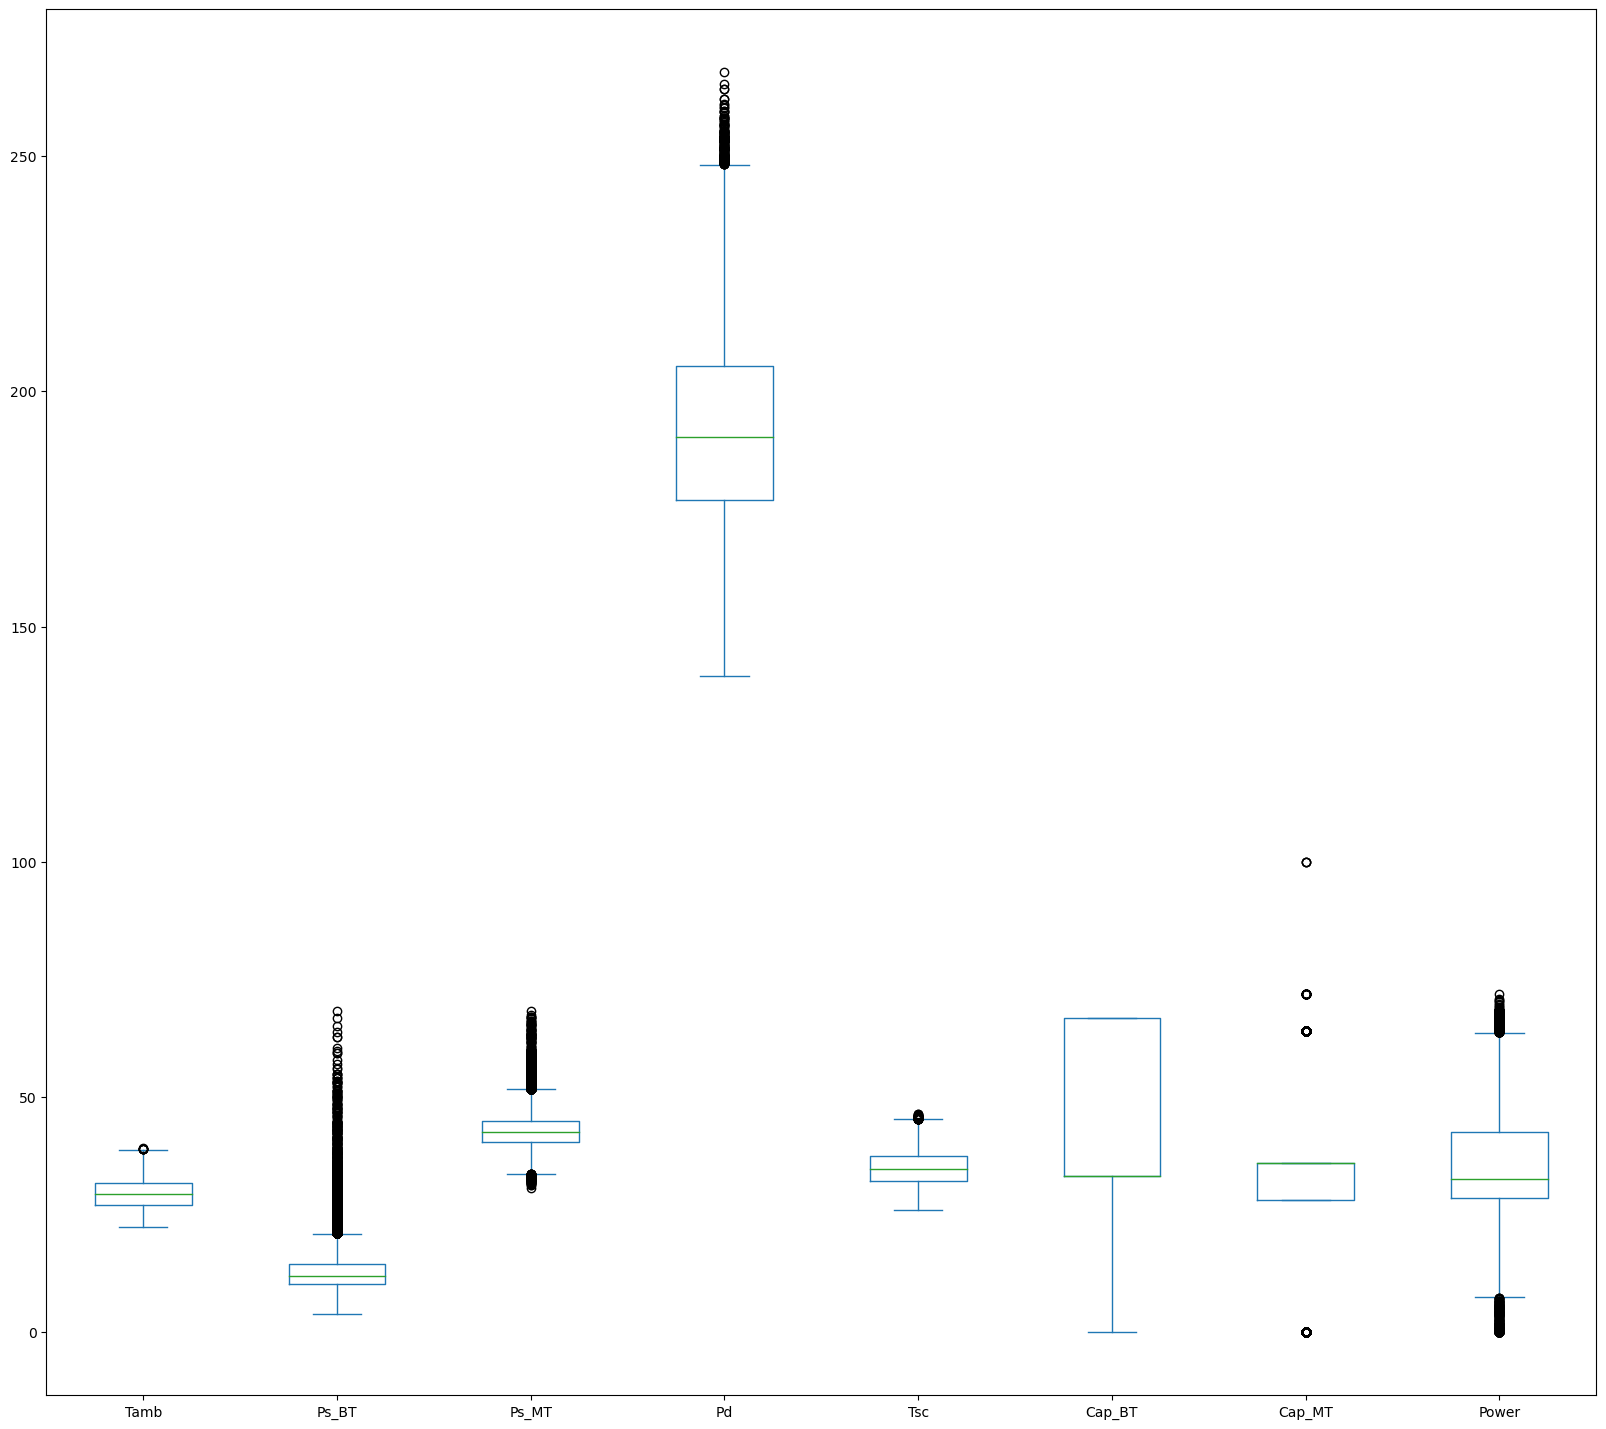

In [20]:
df.plot.box( figsize = (20, 18) )

12. Se comprueba que el sistema logra mantener cierta estabilidad en dos de potencia sin importar la variación de temperatura.

<Axes: xlabel='Tamb', ylabel='Power'>

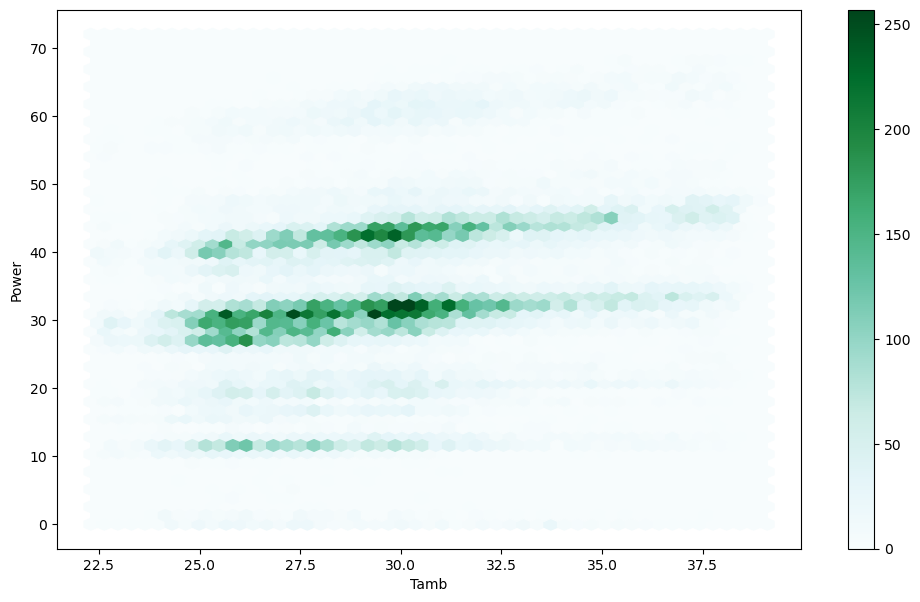

In [21]:
df.plot.hexbin('Tamb', 'Power', figsize = (12, 7), gridsize = 50 )

13. Se demuestra el efecto de la presión de descarga sobre la temperatura de salida del intercambiador, aún con este elemento de mejora de subcooling, este no logra ser controlado cuando la presión de descarga aumenta.

<Axes: xlabel='Pd', ylabel='Tsc'>

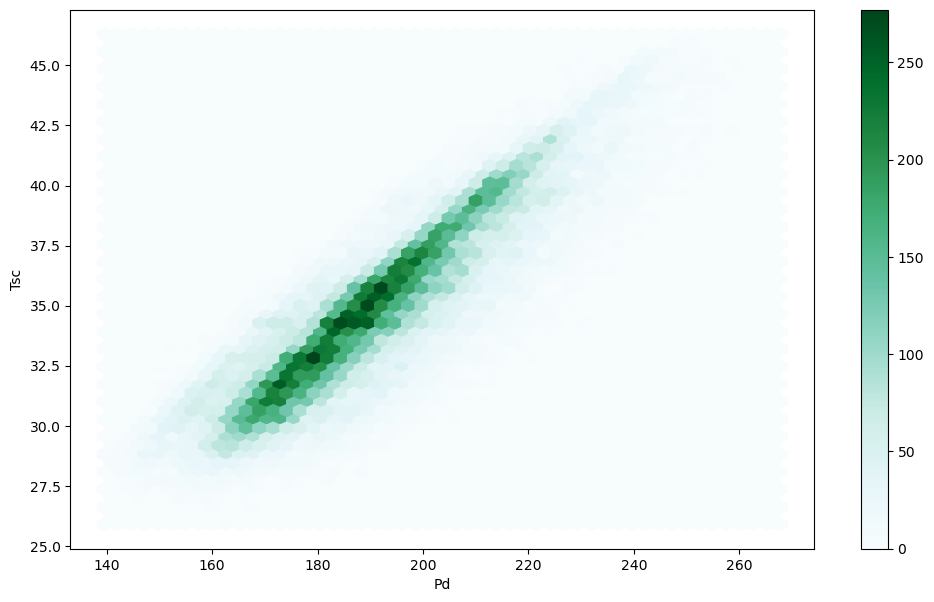

In [22]:
df.plot.hexbin('Pd', 'Tsc', figsize = (12, 7), gridsize = 50 )

In [23]:
df.skew(axis = 0, skipna = True, numeric_only = True)

Tamb      0.449157
Ps_BT     2.549046
Ps_MT     1.210749
Pd        0.339760
Tsc       0.363125
Cap_BT   -0.283640
Cap_MT    0.558653
Power     0.009472
dtype: float64

## 4. MODELAMIENTO: ##

### _4.A SELECCIÓN DEL MODELO APROPIADO_ ###

1. Se divide el conjunto de datos en X, y.

In [24]:
#X = df.loc[:, df.columns != ['Power', 'Time'] ]
X = df[ df.columns.difference(['Power', 'Time']) ]
y = df.loc[:, 'Power']
print(X.shape, y.shape)
print(X.sample(5))

(46618, 7) (46618,)
       Cap_BT  Cap_MT     Pd  Ps_BT  Ps_MT  Tamb   Tsc
1684     33.3    35.9  208.6   14.2   37.6  32.8  37.5
31456    33.3    64.1  199.3   10.3   42.0  29.2  34.3
35369    33.3    35.9  188.9   12.9   40.8  30.6  36.1
9997     66.7    64.1  169.3   11.5   43.6  22.9  30.6
41534    66.7    35.9  194.9   12.7   44.2  29.7  35.1


2. Se realiza la estandarización de los datos haciendo uso de MinMax Scaler y se revisa la salida obtenida.

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler( feature_range = (0, 1) )
X_scaled = scaler.fit_transform( X.loc[:, X.columns != 'Time'] )
print(X_scaled[0,:])
print(y.shape)

[0.49925037 0.359      0.41543258 0.09782609 0.41333333 0.52380952
 0.51470588]
(46618,)


3. Se parten los datos en entrenamiento y prueba con una partición de $70\%$, $30\%$ respectivamente, se obtienen particiones para los 
datos escalados y sin escalar.

In [26]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_scaled, y, 
                                                    random_state=12, test_size=0.3)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=12, test_size=0.3)

4. En la búsqueda de modelos apropiados para el sistema se encuentran 3 opciones:

-_Regresión con vecinos más cercanos:_ Modelo sencillo que puede entregar resultados rápidos, por la naturaleza periódica de
los datos permitia inferir que lograría buenos resultados.  
  
-_Regresión con RandomForest:_ Se deciden emplear múltiples arboles de decisión, entendiendo que por la descripción de las variables
unas variables aportarían mucho más en peso que otras a la constitución de los valores de energía, se decide probar este método basado
en teoría de la información.  
  
-_Regresión con Redes Neuronales:_ Debido a que se tenía una cantidad de datos importante para trabajar, se decide probar este método
dada su capacidad de entregar buenos resultados para grandes volumenes de datos.

In [27]:
model = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
model.fit(X_train, y_train)
y_pred_KN = model.predict(X_test)

Se hace una prueba inicial del método de vécinos más cercanos y se obtiene un resultado con una correlación clara entre los datos
de prueba y los predichos, en este caso se decide usar el MSE y se obtiene un MSE  de 4.7.

13986
4.711629608362912


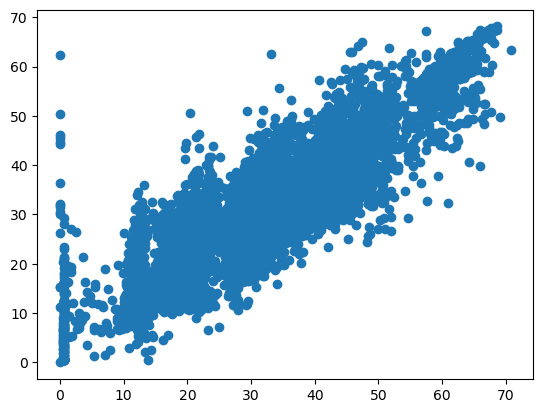

In [28]:
from sklearn.metrics import mean_squared_error

print(y_pred_KN.size)
print( np.sqrt(mean_squared_error(y_test, y_pred_KN)) )
plt.scatter(y_test, y_pred_KN)


### _4.B, 4.C DISEÑO EXPERIMENTACIÓN Y ENTRENAMIENTO DE MODELOS_ ###

5. Se crea un pipeline para encapsular todo el proceso de modelamiento, entrenamiento, selección de hiperparámetros y validación cruzada.
   Se inicia con el método de vecinos más cercanos buscando los mejores valores para los siguientes hiperparámetros:
  
  - _n_neighbors:_ Validación del mejor número de vecinos entre 2 y 20 con salto de 2.
  - _weights:_ Validación del mejor peso entre uniforme y distancia.

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline_1 = Pipeline([
    ('KN', KNeighborsRegressor())
])

parameters_1 = {
    'KN__n_neighbors' : [i for i in range(2, 20, 2) ],
    'KN__weights'     : ['uniform', 'distance']
}

grid_search_1 = GridSearchCV(pipeline_1, parameters_1, cv=3,
                            verbose = 3)

In [98]:
grid_search_1.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END KN__n_neighbors=2, KN__weights=uniform;, score=0.809 total time=   0.2s
[CV 2/3] END KN__n_neighbors=2, KN__weights=uniform;, score=0.804 total time=   0.2s
[CV 3/3] END KN__n_neighbors=2, KN__weights=uniform;, score=0.803 total time=   0.1s
[CV 1/3] END KN__n_neighbors=2, KN__weights=distance;, score=0.809 total time=   0.1s
[CV 2/3] END KN__n_neighbors=2, KN__weights=distance;, score=0.804 total time=   0.1s
[CV 3/3] END KN__n_neighbors=2, KN__weights=distance;, score=0.803 total time=   0.1s
[CV 1/3] END KN__n_neighbors=4, KN__weights=uniform;, score=0.833 total time=   0.2s
[CV 2/3] END KN__n_neighbors=4, KN__weights=uniform;, score=0.830 total time=   0.2s
[CV 3/3] END KN__n_neighbors=4, KN__weights=uniform;, score=0.831 total time=   0.2s
[CV 1/3] END KN__n_neighbors=4, KN__weights=distance;, score=0.835 total time=   0.3s
[CV 2/3] END KN__n_neighbors=4, KN__weights=distance;, score=0.831 total time=   0.2s

GridSearchCV(cv=3, estimator=Pipeline(steps=[('KN', KNeighborsRegressor())]),
             param_grid={'KN__n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'KN__weights': ['uniform', 'distance']},
             verbose=3)

Se observa una correlación mayor al 84%, lo cual indica que hay un buen comportamiento del modelo, esto se corrbora con la gráfica de correlación.

In [99]:
print(f"Mejor puntuación: {grid_search_1.best_score_}")
print("Mejor valores parámetros:")

best_parameters_1 = grid_search_1.best_params_
for param in sorted(parameters_1.keys()):
    print(f"\t{param}: {best_parameters_1[param]}")

Mejor score: 0.8421081769086564
Mejor configuración de parámetros:
	KN__n_neighbors: 10
	KN__weights: distance


4.626204271805326


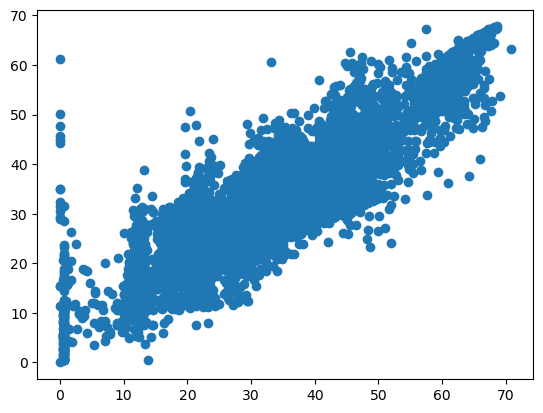

In [100]:
y_pred_1 = grid_search_1.predict(X_test)
print( np.sqrt(mean_squared_error(y_test, y_pred_1)) )
plt.scatter(y_test, y_pred_1)

6. Se crea un nuevo pipeline para la evaluación de random forest buscando ajustar los siguientes hiperparámetros:

-_n_estimators:_  se prueban varias cantidades de arboles.

-_max_features:_ Se ajusta el porcentaje de características a tomar en cada split.

In [101]:
from sklearn.ensemble import RandomForestRegressor

pipeline_2 = Pipeline([
    ('RF', RandomForestRegressor())
])

parameters_2 = {
    'RF__n_estimators' : [i for i in range(2, 20, 2) ],
    'RF__max_features' : [i/5 for i in range(2, 5, 1) ]
}

grid_search_2 = GridSearchCV(pipeline_2, parameters_2, cv=3,
                            verbose = 3)

grid_search_2.fit(X_train, y_train)



Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END RF__max_features=0.4, RF__n_estimators=2;, score=0.759 total time=   0.0s
[CV 2/3] END RF__max_features=0.4, RF__n_estimators=2;, score=0.764 total time=   0.0s
[CV 3/3] END RF__max_features=0.4, RF__n_estimators=2;, score=0.759 total time=   0.0s
[CV 1/3] END RF__max_features=0.4, RF__n_estimators=4;, score=0.810 total time=   0.1s
[CV 2/3] END RF__max_features=0.4, RF__n_estimators=4;, score=0.807 total time=   0.1s
[CV 3/3] END RF__max_features=0.4, RF__n_estimators=4;, score=0.810 total time=   0.1s
[CV 1/3] END RF__max_features=0.4, RF__n_estimators=6;, score=0.834 total time=   0.2s
[CV 2/3] END RF__max_features=0.4, RF__n_estimators=6;, score=0.819 total time=   0.2s
[CV 3/3] END RF__max_features=0.4, RF__n_estimators=6;, score=0.821 total time=   0.2s
[CV 1/3] END RF__max_features=0.4, RF__n_estimators=8;, score=0.837 total time=   0.3s
[CV 2/3] END RF__max_features=0.4, RF__n_estimators=8;, score=0.832 t

GridSearchCV(cv=3, estimator=Pipeline(steps=[('RF', RandomForestRegressor())]),
             param_grid={'RF__max_features': [0.4, 0.6, 0.8],
                         'RF__n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18]},
             verbose=3)

El modelo ya ha superado la correlación del 85%, generando una leve mejoría respecto al modelo de vecinos más cercanos, esto se ha
logrado haciendo uso de 16 árboles y tomando el 60% de las características en cada split.

In [102]:
print(f"Mejor puntuación: {grid_search_2.best_score_}")
print("Mejor valores parámetros:")

best_parameters_2 = grid_search_2.best_params_
for param in sorted(parameters_2.keys()):
    print(f"\t{param}: {best_parameters_2[param]}")

Mejor score: 0.8530725433032603
Mejor configuración de parámetros:
	RF__max_features: 0.6
	RF__n_estimators: 16


EL MSE en los datos de prueba demuestra que en efecto este modelo presenta un mejor comportamiento respecto a posibles errores grandes que el modelo de vecinos más cercanos.

4.448398533524646


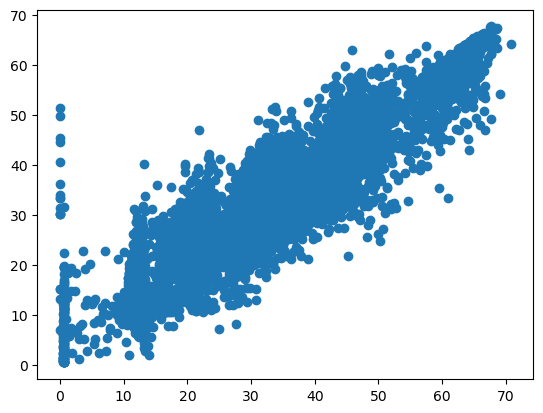

In [104]:
y_pred_2 = grid_search_2.predict(X_test)
print( np.sqrt(mean_squared_error(y_test, y_pred_2)) )
plt.scatter(y_test, y_pred_2)

7. Por último se desarrolla el pipeline para redes neuronales, en este caso se evaluaron múltiples hiperparámetros:  

    El objetivo era encontrar el solver y los métodos de activación más adecuados para este sistema, se encuentra que el solver _Adam_ funciona muy bien para este caso, en cambio, _sgd_ lo hace de forma bastante regular

In [89]:
from sklearn.neural_network import MLPRegressor

pipeline_3 = Pipeline([
    ('MLP', MLPRegressor())
])

parameters_3 = {
    'MLP__hidden_layer_sizes' : [60, 90, 120 ],
    'MLP__activation' : [ 'identity', 'logistic', 'tanh', 'relu' ],
    'MLP__solver' : [ 'lbfgs', 'sgd', 'adam' ],
    'MLP__max_iter' : [ 200 ],
    'MLP__random_state' : [ 1 ]
}

grid_search_3 = GridSearchCV(pipeline_3, parameters_3, cv=3,
                            verbose = 3)

grid_search_3.fit(X_train, y_train)



Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END MLP__activation=identity, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.822 total time=   3.9s
[CV 2/3] END MLP__activation=identity, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.810 total time=   1.4s
[CV 3/3] END MLP__activation=identity, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.819 total time=   3.1s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value en

[CV 1/3] END MLP__activation=identity, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=nan total time=   8.0s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/3] END MLP__activation=identity, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=nan total time=   8.4s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END MLP__activation=identity, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=nan total time=   7.4s
[CV 1/3] END MLP__activation=identity, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.818 total time=   2.4s
[CV 2/3] END MLP__activation=identity, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.808 total time=   3.0s
[CV 3/3] END MLP__activation=identity, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.818 total time=   2.1s
[CV 1/3] END MLP__activation=identity, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.822 total time=   3.2s
[CV 2/3] END MLP__activation=identity, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.810 total time=   1.5s
[CV 3/3] END MLP__activation=identity, MLP__hidden_layer_si

c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py

[CV 1/3] END MLP__activation=identity, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=nan total time=   8.2s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/3] END MLP__activation=identity, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=nan total time=   8.0s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END MLP__activation=identity, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=nan total time=   8.1s
[CV 1/3] END MLP__activation=identity, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.794 total time=   2.0s
[CV 2/3] END MLP__activation=identity, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.805 total time=   2.3s
[CV 3/3] END MLP__activation=identity, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.818 total time=   2.5s
[CV 1/3] END MLP__activation=identity, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.822 total time=   5.2s
[CV 2/3] END MLP__activation=identity, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.810 total time=   2.8s
[CV 3/3] END MLP__activation=identity, MLP__hidden_layer_

c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py

[CV 1/3] END MLP__activation=identity, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=nan total time=   9.3s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/3] END MLP__activation=identity, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=nan total time=   9.3s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END MLP__activation=identity, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=nan total time=   9.3s
[CV 1/3] END MLP__activation=identity, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.820 total time=   3.5s
[CV 2/3] END MLP__activation=identity, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.809 total time=   2.3s
[CV 3/3] END MLP__activation=identity, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.811 total time=   1.4s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.785 total time=  12.9s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.775 total time=  12.9s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.783 total time=   9.8s
[CV 1/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=0.450 total time=   1.5s
[CV 2/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=0.452 total time=   2.3s
[CV 3/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.002 total time=   0.7s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.855 total time=  12.0s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.849 total time=  12.8s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.853 total time=  12.4s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.796 total time=  20.6s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.782 total time=  21.6s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.780 total time=  15.6s
[CV 1/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.000 total time=   0.8s
[CV 2/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.000 total time=   0.8s
[CV 3/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=0.466 total time=   2.3s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.862 total time=  14.9s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.851 total time=  15.1s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.862 total time=  15.3s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.796 total time=  19.7s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.777 total time=  20.3s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.775 total time=  20.1s
[CV 1/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=0.453 total time=   3.3s
[CV 2/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=0.418 total time=   3.9s
[CV 3/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=0.458 total time=   3.5s
[CV 1/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.863 total time=  18.8s
[CV 2/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.850 total time=  16.5s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.862 total time=  19.4s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.787 total time=  15.2s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.718 total time=  17.0s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.772 total time=  16.0s
[CV 1/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.000 total time=   2.9s
[CV 2/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=0.000 total time=   1.8s
[CV 3/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.001 total time=   1.7s
[CV 1/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.858 total time=  16.9s
[CV 2/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.844 total time=  12.8s
[CV 3/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=60, MLP__max_iter=200, 

c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.805 total time=  22.0s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.798 total time=  22.7s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.799 total time=  23.1s
[CV 1/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.002 total time=   1.9s
[CV 2/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.000 total time=   1.7s
[CV 3/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.002 total time=   1.7s
[CV 1/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.855 total time=  19.8s
[CV 2/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.850 total time=  22.1s
[CV 3/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=90, MLP__max_iter=200,

c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.792 total time=  33.4s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.778 total time=  30.9s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.799 total time=  30.2s
[CV 1/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.001 total time=   2.5s
[CV 2/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.000 total time=   2.0s
[CV 3/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.001 total time=   3.9s
[CV 1/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.864 total time=  27.5s
[CV 2/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.843 total time=  25.1s
[CV 3/3] END MLP__activation=tanh, MLP__hidden_layer_sizes=120, MLP__max_it

c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3] END MLP__activation=relu, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.831 total time=   8.5s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3] END MLP__activation=relu, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.818 total time=   7.4s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3] END MLP__activation=relu, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.826 total time=   9.0s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END MLP__activation=relu, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.000 total time=  12.8s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END MLP__activation=relu, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=0.000 total time=  15.0s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END MLP__activation=relu, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.000 total time=  12.9s
[CV 1/3] END MLP__activation=relu, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.834 total time=   7.1s
[CV 2/3] END MLP__activation=relu, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.830 total time=  13.2s
[CV 3/3] END MLP__activation=relu, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.838 total time=   5.8s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3] END MLP__activation=relu, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.828 total time=  11.4s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3] END MLP__activation=relu, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.816 total time=  10.7s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3] END MLP__activation=relu, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.821 total time=  12.1s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END MLP__activation=relu, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.000 total time=  14.3s
[CV 2/3] END MLP__activation=relu, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.000 total time=   0.9s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END MLP__activation=relu, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.000 total time=  13.9s
[CV 1/3] END MLP__activation=relu, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.836 total time=   9.6s
[CV 2/3] END MLP__activation=relu, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.832 total time=  12.9s
[CV 3/3] END MLP__activation=relu, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.828 total time=   6.0s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3] END MLP__activation=relu, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.827 total time=  14.3s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3] END MLP__activation=relu, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.817 total time=  14.4s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3] END MLP__activation=relu, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=lbfgs;, score=0.826 total time=  15.2s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END MLP__activation=relu, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.000 total time=  14.5s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END MLP__activation=relu, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.000 total time=  14.9s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END MLP__activation=relu, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=sgd;, score=-0.000 total time=  13.8s
[CV 1/3] END MLP__activation=relu, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.821 total time=   8.7s
[CV 2/3] END MLP__activation=relu, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.833 total time=   9.6s
[CV 3/3] END MLP__activation=relu, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.840 total time=  12.5s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", li

GridSearchCV(cv=3, estimator=Pipeline(steps=[('MLP', MLPRegressor())]),
             param_grid={'MLP__activation': ['identity', 'logistic', 'tanh',
                                             'relu'],
                         'MLP__hidden_layer_sizes': [60, 90, 120],
                         'MLP__max_iter': [200], 'MLP__random_state': [1],
                         'MLP__solver': ['lbfgs', 'sgd', 'adam']},
             verbose=3)

El modelo de redes neuronales obtiene el mejor comportamiento, sin embargo, por la cercania en los Scores, cualidades como el tiempo de ejecución y facilidad de explicación del modelo podrían hacer que randomforest sea la opción ideal como modelo definitivo.

In [105]:
print(f"Mejor puntuación: {grid_search_3.best_score_}")
print("Mejor valores parámetros:")

best_parameters_3 = grid_search_3.best_params_
for param in sorted(parameters_3.keys()):
    print(f"\t{param}: {best_parameters_3[param]}")

Mejor score: 0.8584620529963191
Mejor configuración de parámetros:
	MLP__activation: logistic
	MLP__hidden_layer_sizes: 90
	MLP__max_iter: 200
	MLP__random_state: 1
	MLP__solver: adam


4.395977904395763


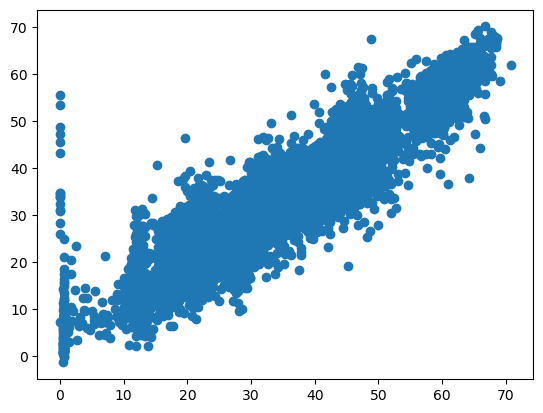

In [106]:
y_pred_3 = grid_search_3.predict(X_test)
print( np.sqrt(mean_squared_error(y_test, y_pred_3)) )
plt.scatter(y_test, y_pred_3)

## CONCLUSIONES ##

1. El modelo seleccionado para este sistema es el randomfores con 16 árboles y 60% de características tomadas en cada split, se obtiene un score de R2 mayor al 85%.

2. Para este ejercicio no se tomaron datos que representan la carga térmica que se impone al sistema, se propone para una nueva iteración cargar otras variables como aperturas de válvulas y desarrollar un PCA para encontrar las que aportan más al comportamiento de la potencia.

3. Debido a que es posible que se hayan modificado parámetros de control en el rango de tiempo de la toma de datos, debe verificarse si esto podría alterar las predicciones que haga el modelo y si este debe ajustarse dinamicamente para permitir al usuario ajustar su sistema.

4. El preprocesamiento permitió comprender además de la importancia de cada variable al modelo, problemas y preexistencias del sistema que deben
ser corregidas para predecir luego con un sistema operando correctamente.